# 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Data wrangling
#### 3. Elbow technique
#### 4. K-means clustering
#### 5. Calculate descriptive statistics for clusters
#### 6. Trying 3D plot

## 01 Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
# importing data
path = 'I:/CF/Immersion into Data Analystics/6 Advanced Analytics and Dashboard Design/SteamGames'

In [4]:
df_steam1 = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'gamesc.xsxl'))

In [5]:
# inspect data
df_steam1.shape

(27077, 32)

In [7]:
# change display options
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [8]:
df_steam1.head()

,appid,name,release_date,release_year,release_month,english,Developer,publisher,platforms,required_age,single_player_yn,multi_player_yn,Co-op_yn,MMO_yn,Cross_Platform_yn,primary_genre,secondary_genre,tertiary_genre,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,num_of_owners_range,owners_low,owners_mid,owners_high,price,Developer_city,Administrative division,Developer_country,Year_Dev_Est
14786,550160,Street Champ VR,2016-12-08,2016,12,1,Zynk Software Srl,Zynk Software Srl,windows,0,Yes,No,Yes,No,No,Action,Adventure,Simulation,0,20,0,0,0,0-20000,0,10000,20000,0.79,NaN,NaN,Romania,NaN
23863,852190,10 seconds,2018-07-16,2018,7,1,Zynk Software,Zynk Software,windows,0,Yes,No,Yes,No,No,Action,Casual,Indie,0,3,0,0,0,0-20000,0,10000,20000,3.99,NaN,NaN,Romania,NaN
9878,412140,Electric Highways,2015-10-28,2015,10,1,Zykov Eddy;Xitilon,Siberian Digital,windows,0,Yes,No,Yes,No,No,Adventure,Free to Play,Indie,0,1139,143,12,14,100000-200000,100000,50000,200000,0.00,NaN,NaN,Russia,NaN
22108,786370,Alien Crusader,2018-03-09,2018,3,1,Zydrone,Zydrone,windows,0,Yes,No,Yes,No,No,Action,Free to Play,Indie,0,32,20,1,1,20000-50000,20000,15000,50000,0.00,NaN,NaN,United States,NaN
9301,397830,Zxill: A Legend of Time,2015-09-04,2015,9,1,ZXDigital Ltd;Polyquest Games,ZXDigital Ltd,windows,0,Yes,No,Yes,No,No,Adventure,Indie,RPG,0,1,5,0,0,0-20000,0,10000,20000,4.99,NaN,NaN,United Kingdom,NaN


## 02 Data wrangling

In [ ]:
# drop unnecessary columns
df_steam2 = df_steam1.drop(columns = ['name', 'release_date', 'publisher', 'Developer', 'platforms', 'secondary_genre', 'tertiary_genre', 'num_of_owners_range', 'Developer_country', 'Developer_city', 'Administrative division', 'Year_Dev_Est'])

In [11]:
# changing yes/no variables to intergers so they can be used in analysis
df_steam2 = df_steam2.replace({'Yes': 1, 'No': 0})

In [12]:
# checking output
df_steam2.head()

,appid,release_year,release_month,english,required_age,single_player_yn,multi_player_yn,Co-op_yn,MMO_yn,Cross_Platform_yn,primary_genre,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners_low,owners_mid,owners_high,price
14786,550160,2016,12,1,0,1,0,1,0,0,Action,0,20,0,0,0,0,10000,20000,0.79
23863,852190,2018,7,1,0,1,0,1,0,0,Action,0,3,0,0,0,0,10000,20000,3.99
9878,412140,2015,10,1,0,1,0,1,0,0,Adventure,0,1139,143,12,14,100000,50000,200000,0.00
22108,786370,2018,3,1,0,1,0,1,0,0,Action,0,32,20,1,1,20000,15000,50000,0.00
9301,397830,2015,9,1,0,1,0,1,0,0,Adventure,0,1,5,0,0,0,10000,20000,4.99


In [13]:
# replacing genre names with numbers for analysis
df_steam2 = df_steam2.replace({'Action': 1, 'Adventure': 2, 'Casual': 3, 'Indie':4, 'Violent':5, 'Simulation':6,
                              'Strategy': 7, 'NSFW': 8, 'RPG': 9, 'Racing': 10, 'Design & Illustration': 11,
                              'Massively Multiplayer': 12, 'Sports': 13, 'Utilities': 14, 'Free to Play': 15, 
                               'Education': 16, 'Not Yet Designated': 17})

In [14]:
# checking for null values
df_steam2.isnull().sum()

appid                0
release_year         0
release_month        0
english              0
required_age         0
single_player_yn     0
multi_player_yn      0
Co-op_yn             0
MMO_yn               0
Cross_Platform_yn    0
primary_genre        0
achievements         0
positive_ratings     0
negative_ratings     0
average_playtime     0
median_playtime      0
owners_low           0
owners_mid           0
owners_high          0
price                0
dtype: int64

## 03 Elbow Technique

In [15]:
# Defining range of potential clusters in data and defining k-means clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [16]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_steam2).score(df_steam2) for i in range(len(kmeans))] 

score

[-1.1444913417400131e+17,
 -4.462854735756282e+16,
 -2.5290408907983236e+16,
 -1.5926999419751688e+16,
 -8215980163382880.0,
 -5328352040716010.0,
 -3511869051685118.0,
 -2210376165062632.5,
 -1085342761773746.1]

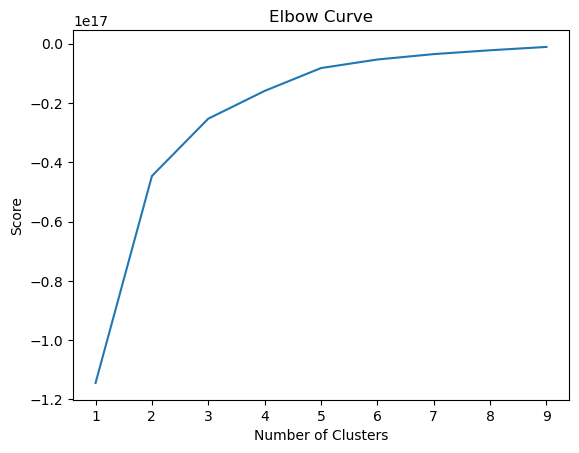

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Elbow crook isn't clear, appears to be between 3 and 5 so I will use 4.

## 04 K-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [19]:
# Fit the k-means object to the data.

kmeans.fit(df_steam2)

KMeans(n_clusters=4)

In [20]:
df_steam2['clusters'] = kmeans.fit_predict(df_steam2)

In [21]:
df_steam2.head()

,appid,release_year,release_month,english,required_age,single_player_yn,multi_player_yn,Co-op_yn,MMO_yn,Cross_Platform_yn,primary_genre,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners_low,owners_mid,owners_high,price,clusters
14786,550160,2016,12,1,0,1,0,1,0,0,1,0,20,0,0,0,0,10000,20000,0.79,0
23863,852190,2018,7,1,0,1,0,1,0,0,1,0,3,0,0,0,0,10000,20000,3.99,0
9878,412140,2015,10,1,0,1,0,1,0,0,2,0,1139,143,12,14,100000,50000,200000,0.00,0
22108,786370,2018,3,1,0,1,0,1,0,0,1,0,32,20,1,1,20000,15000,50000,0.00,0
9301,397830,2015,9,1,0,1,0,1,0,0,2,0,1,5,0,0,0,10000,20000,4.99,0


In [22]:
df_steam2['clusters'].value_counts()

0    27004
3       67
2        5
1        1
Name: clusters, dtype: int64

In [23]:
# checking column names so I have a list of variables.
df_steam2.columns

Index(['appid', 'release_year', 'release_month', 'english', 'required_age',
       'single_player_yn', 'multi_player_yn', 'Co-op_yn', 'MMO_yn',
       'Cross_Platform_yn', 'primary_genre', 'achievements',
       'positive_ratings', 'negative_ratings', 'average_playtime',
       'median_playtime', 'owners_low', 'owners_mid', 'owners_high', 'price',
       'clusters'],
      dtype='object')

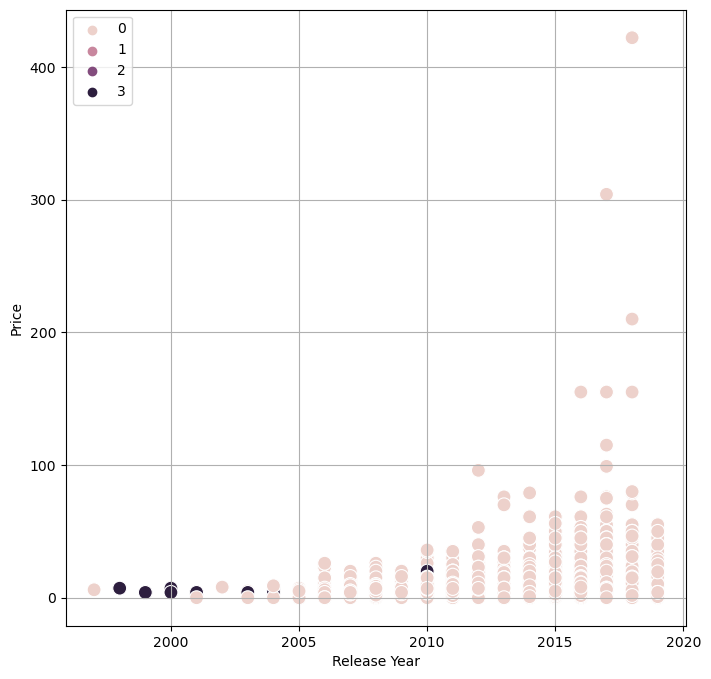

In [74]:
# Plot the clusters for the "Release year" and "price" variables.

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['release_year'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Release Year') 
plt.ylabel('Price') 
plt.show()

#### There are a large number of variables in this dataset. Decided to focus on positive ratings and price variables.

#### Scatterplots for positive ratings 

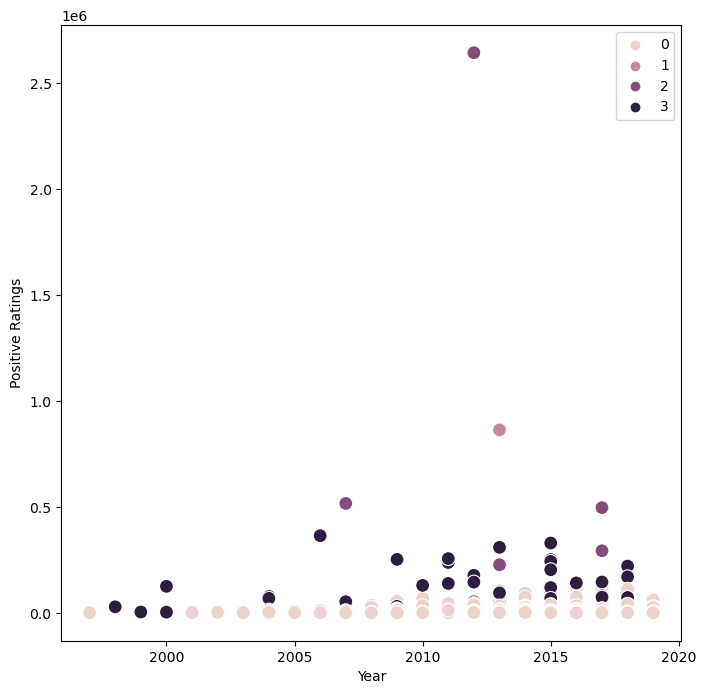

In [25]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['positive_ratings'], x=df_steam2['release_year'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Year') 
plt.show()

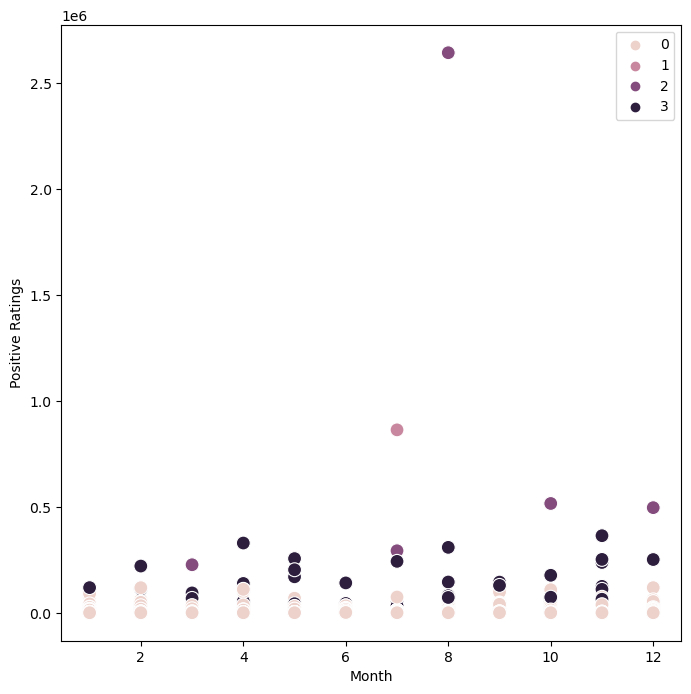

In [26]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['positive_ratings'], x=df_steam2['release_month'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Month') 
plt.show()

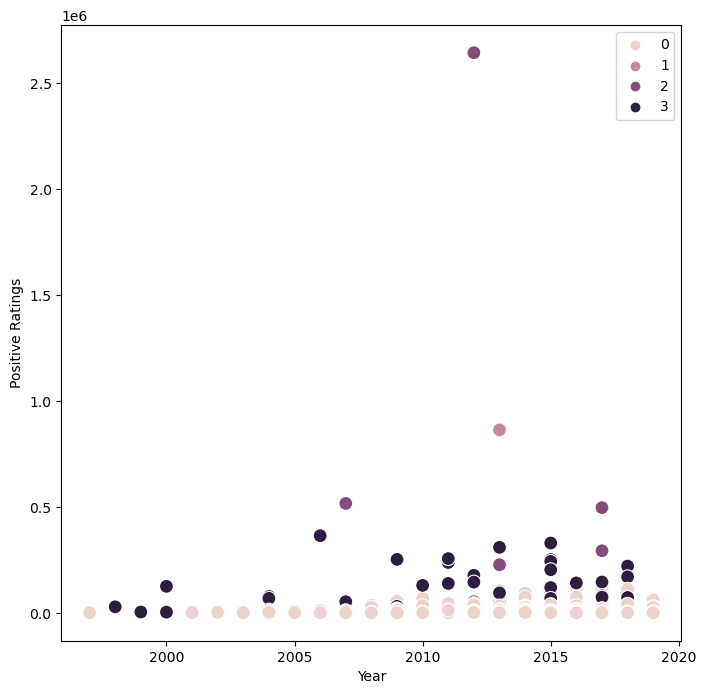

In [27]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['positive_ratings'], x=df_steam2['release_year'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Year') 
plt.show()

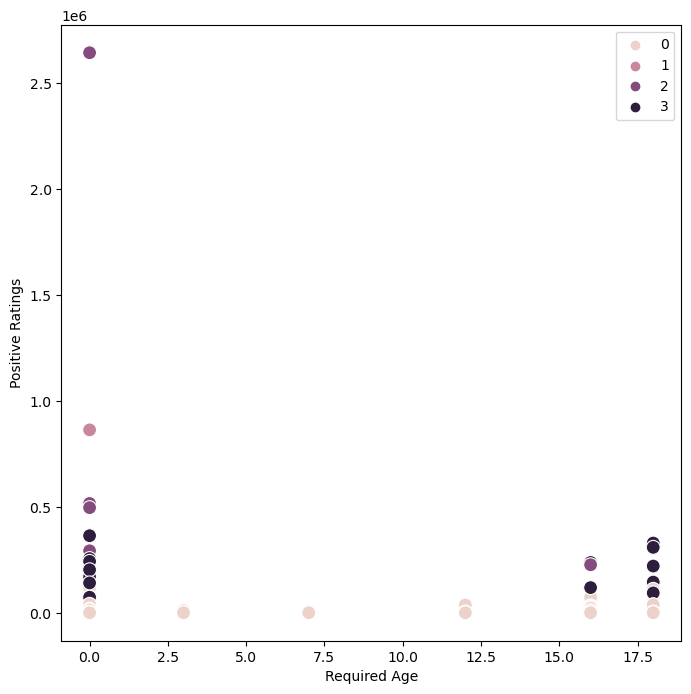

In [28]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['positive_ratings'], x=df_steam2['required_age'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Required Age') 
plt.show()

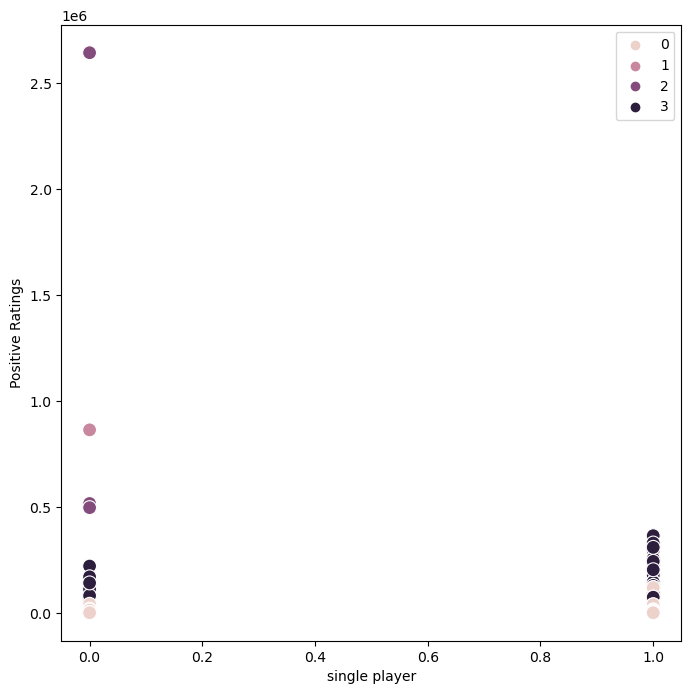

In [29]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['positive_ratings'], x=df_steam2['single_player_yn'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('single player') 
plt.show()

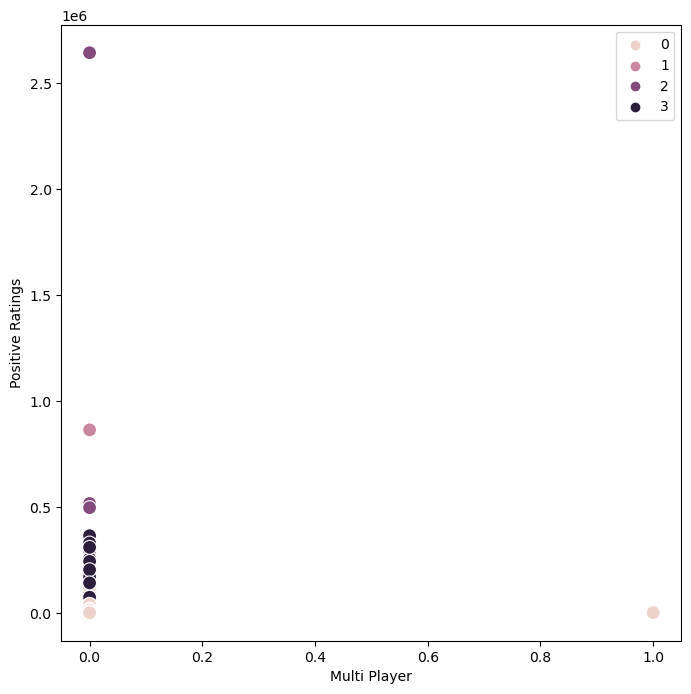

In [30]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['positive_ratings'], x=df_steam2['multi_player_yn'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Multi Player') 
plt.show()

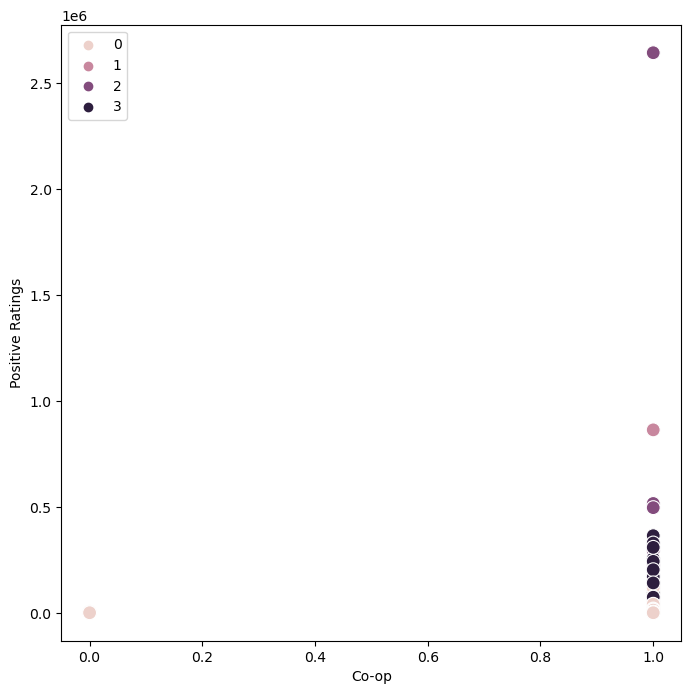

In [31]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['positive_ratings'], x=df_steam2['Co-op_yn'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Co-op') 
plt.show()

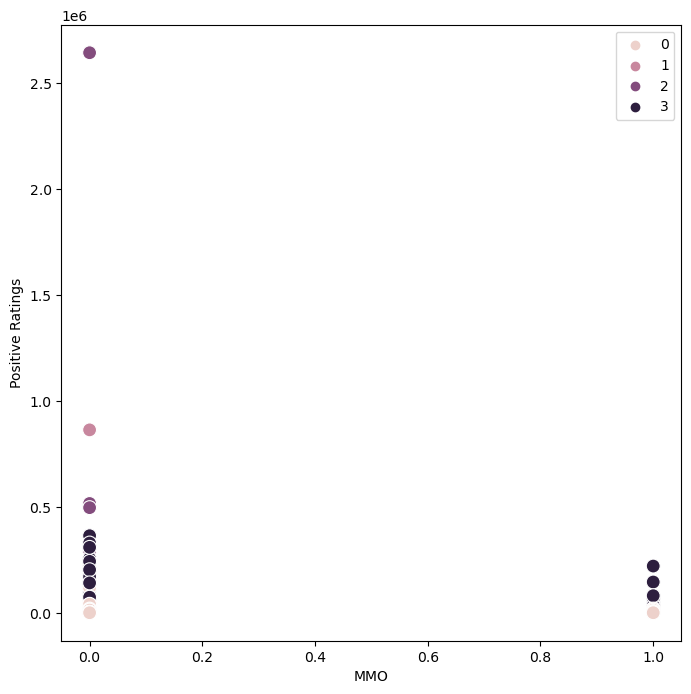

In [32]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['positive_ratings'], x=df_steam2['MMO_yn'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('MMO') 
plt.show()


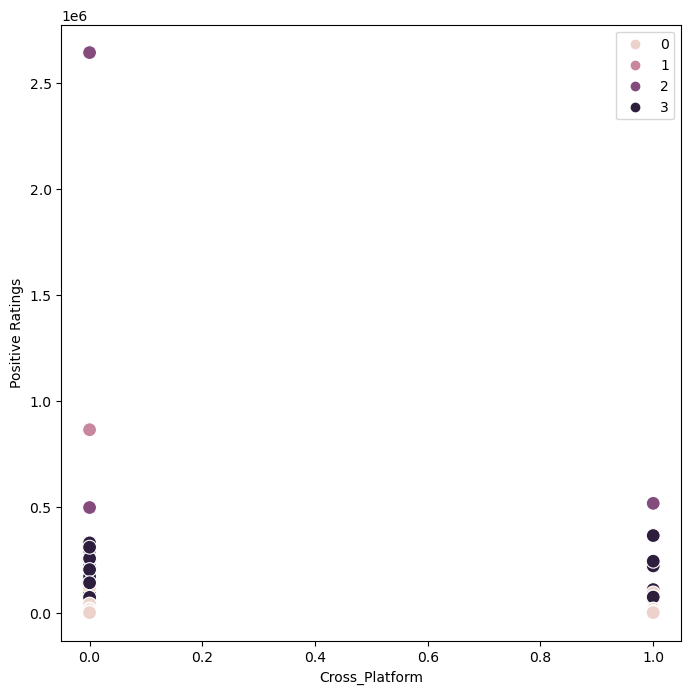

In [33]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(y=df_steam2['positive_ratings'], x=df_steam2['Cross_Platform_yn'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.ylabel('Positive Ratings') 
plt.xlabel('Cross_Platform') 
plt.show()

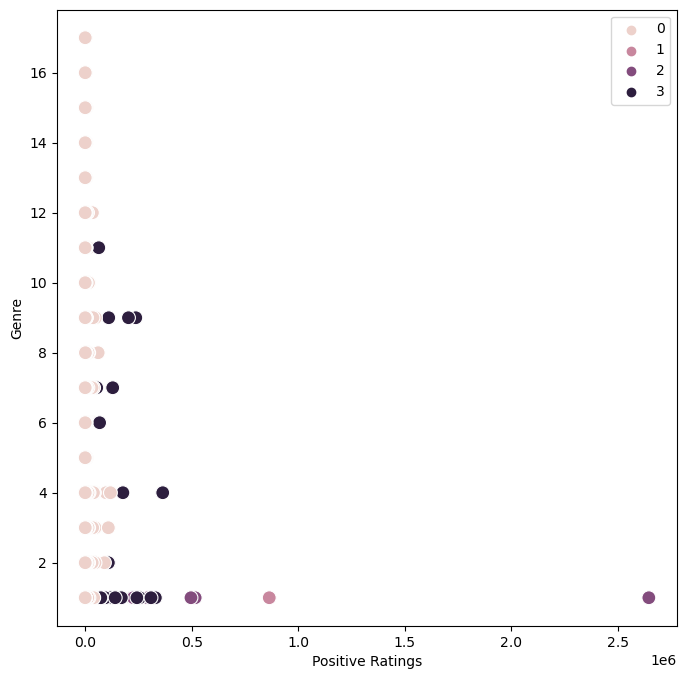

In [34]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['primary_genre'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Genre') 
plt.show()

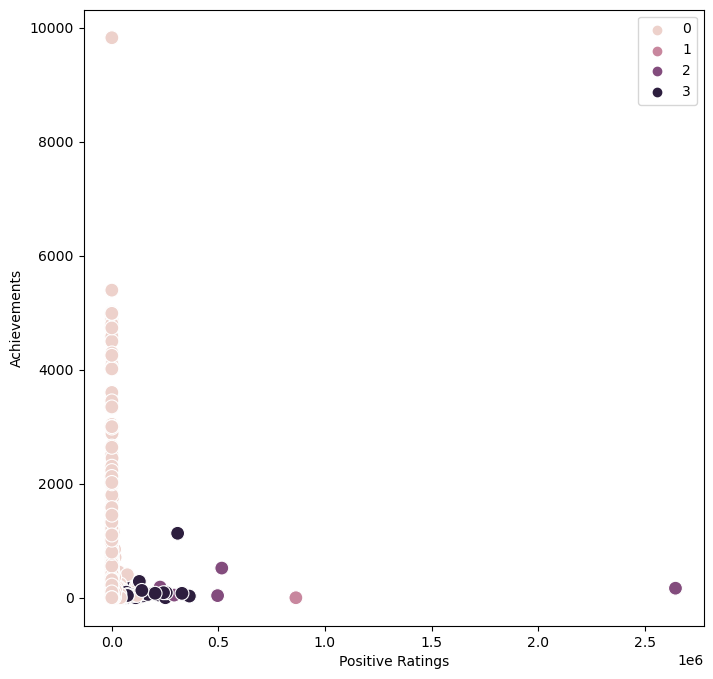

In [35]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['achievements'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Achievements') 
plt.show()

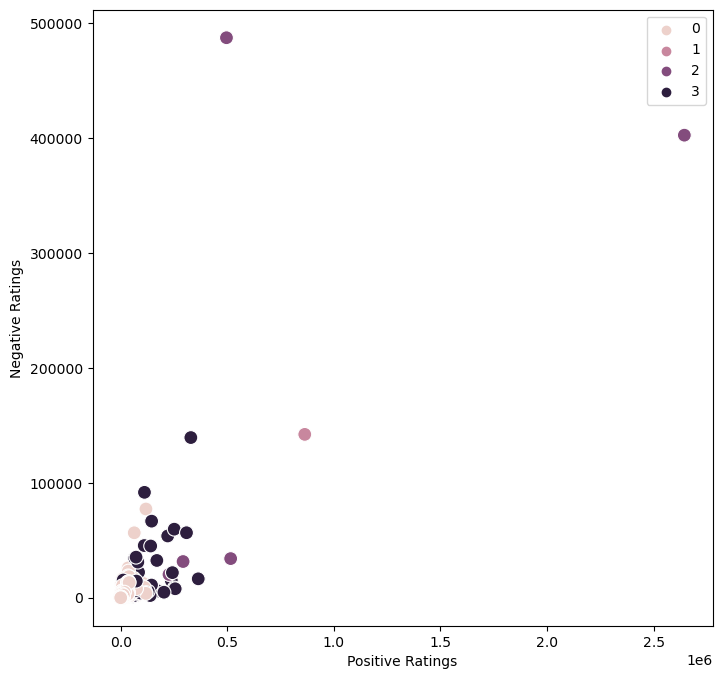

In [36]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['negative_ratings'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Negative Ratings') 
plt.show()

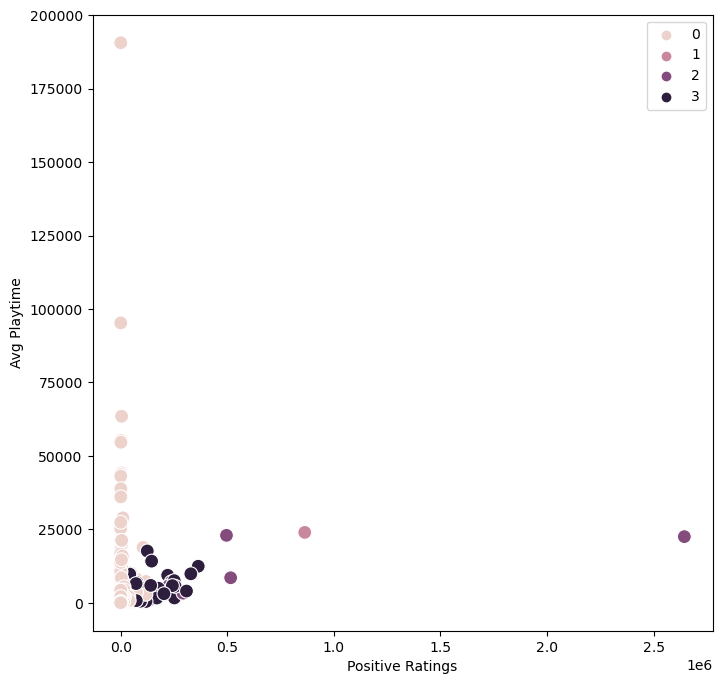

In [37]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['average_playtime'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Avg Playtime') 
plt.show()

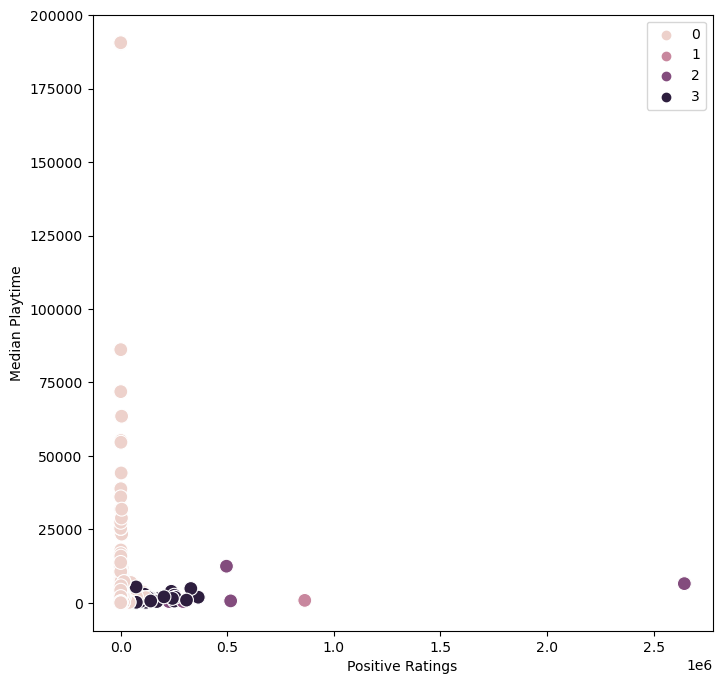

In [38]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['median_playtime'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Median Playtime') 
plt.show()

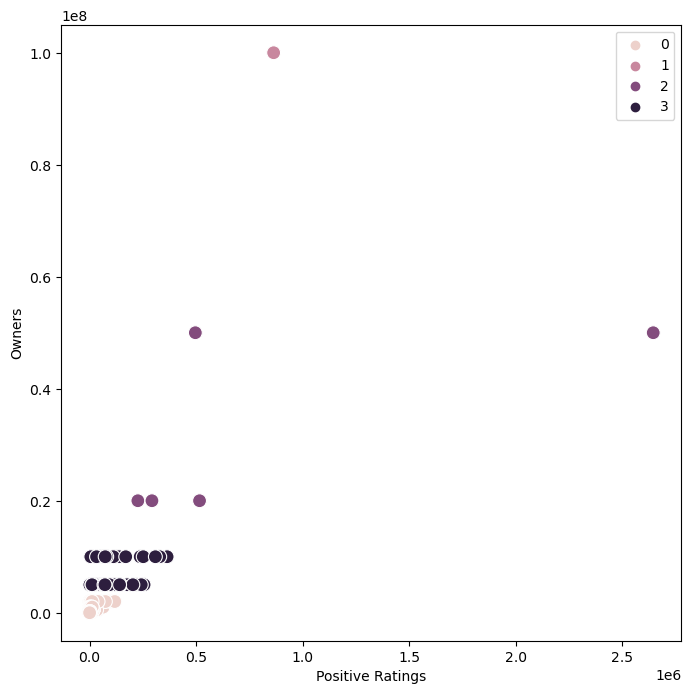

In [39]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['owners_low'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Owners') 
plt.show()

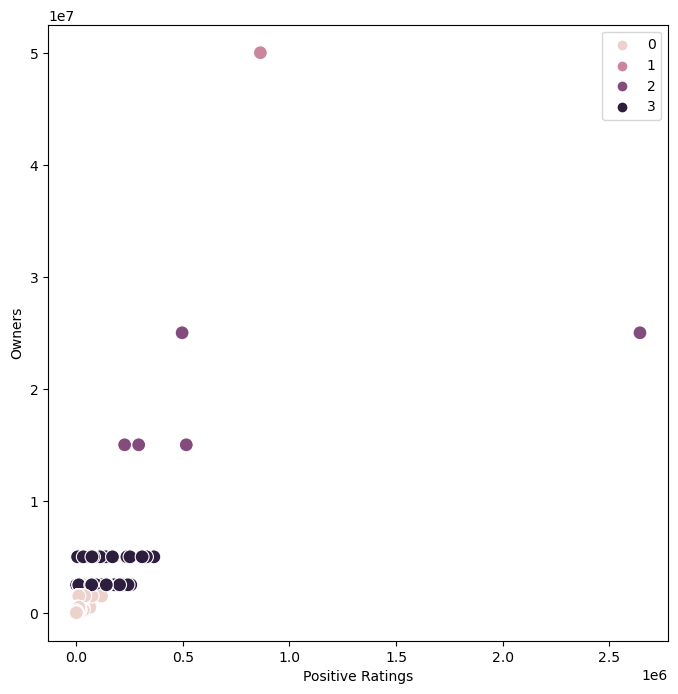

In [40]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['owners_mid'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Owners') 
plt.show()

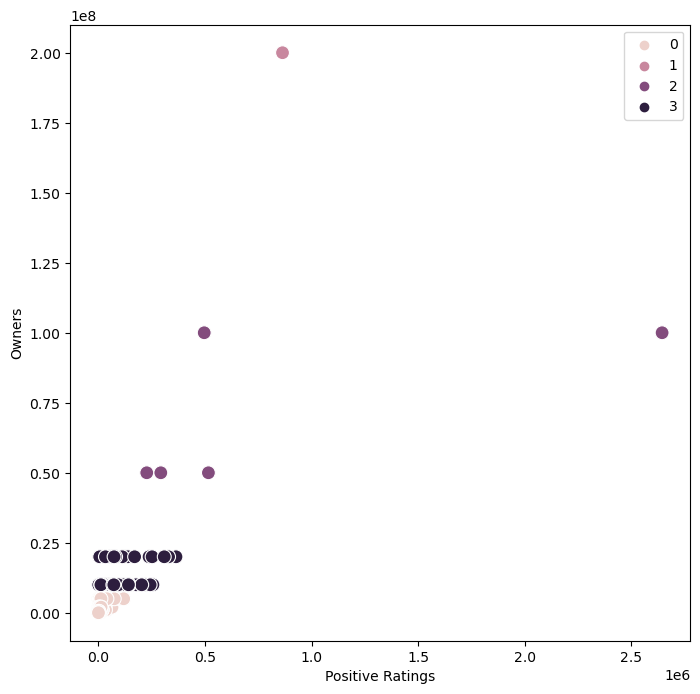

In [41]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['owners_high'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Owners') 
plt.show()

#### Scatterplots with 'price' variable

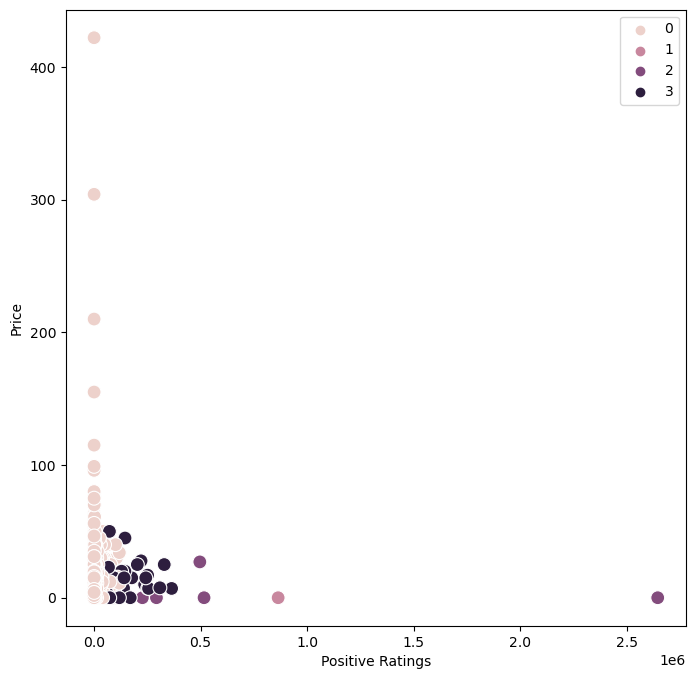

In [42]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Positive Ratings') 
plt.ylabel('Price') 
plt.show()

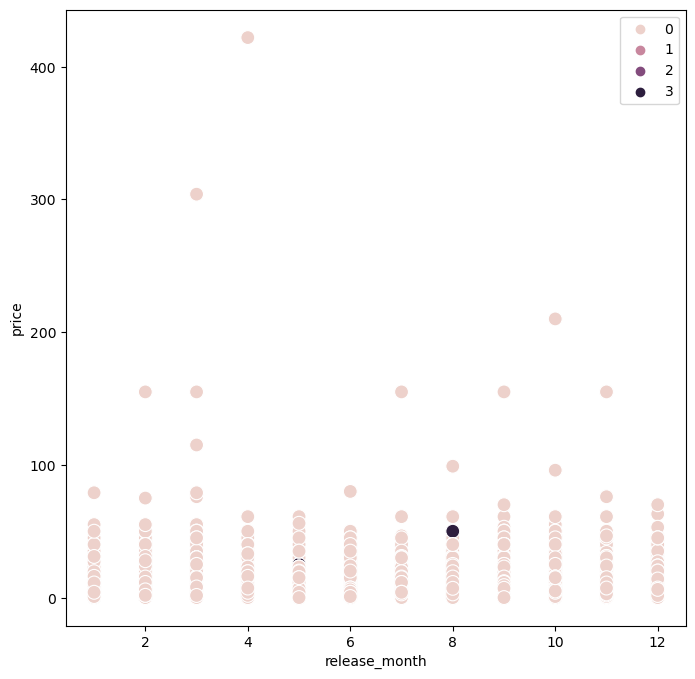

In [43]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['release_month'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('release_month') 
plt.ylabel('price') 
plt.show()

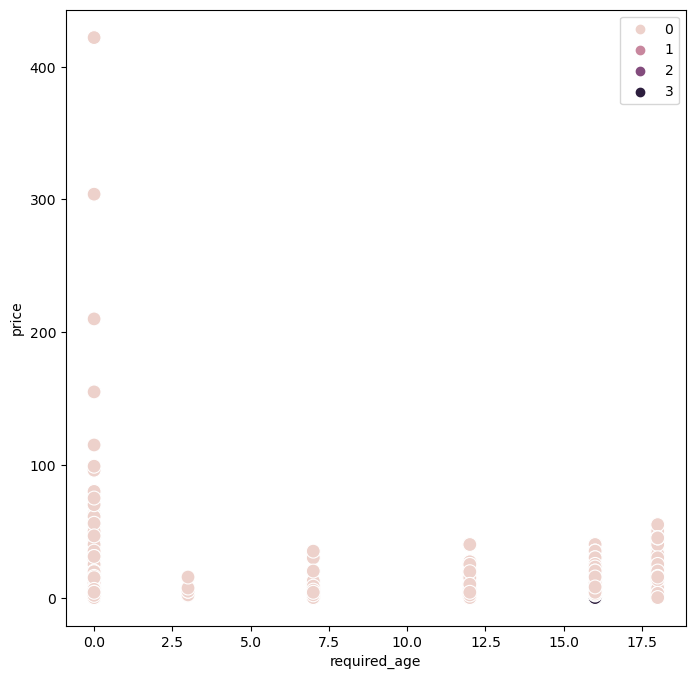

In [44]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['required_age'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('required_age') 
plt.ylabel('price') 
plt.show()

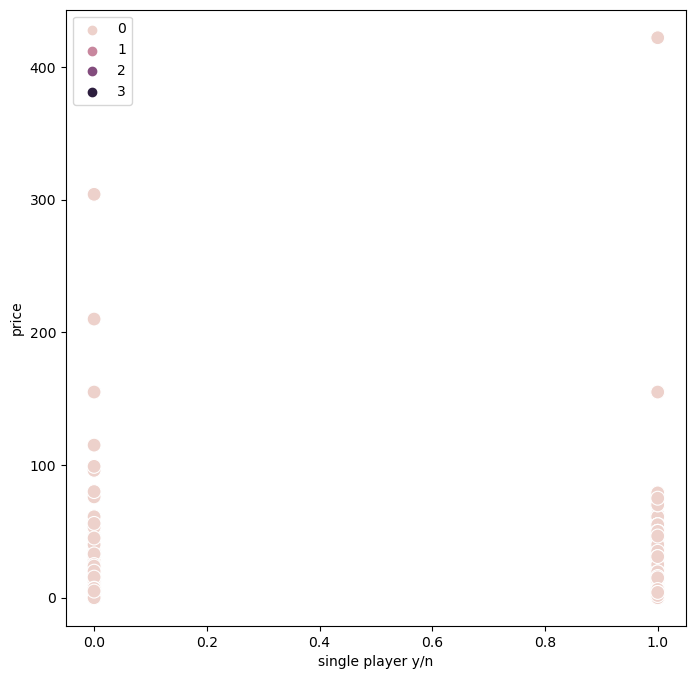

In [45]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['single_player_yn'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('single player y/n') 
plt.ylabel('price') 
plt.show()

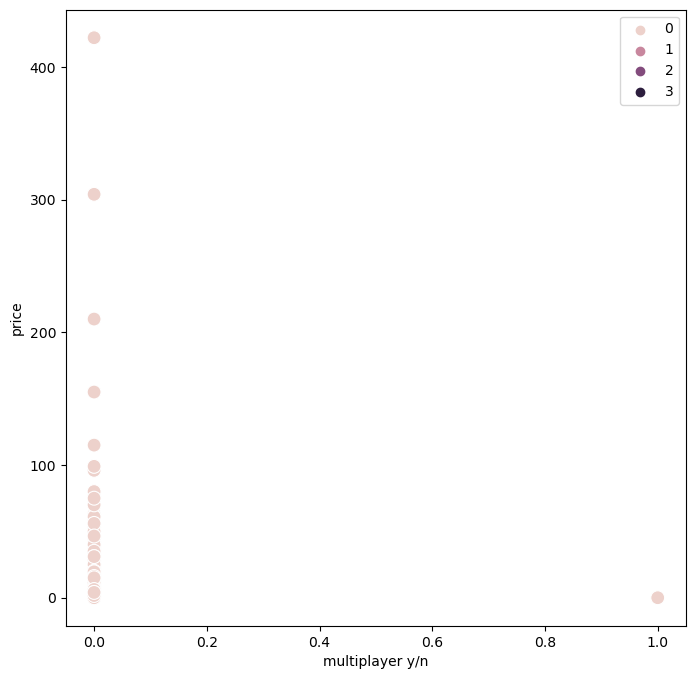

In [46]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['multi_player_yn'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('multiplayer y/n') 
plt.ylabel('price') 
plt.show()

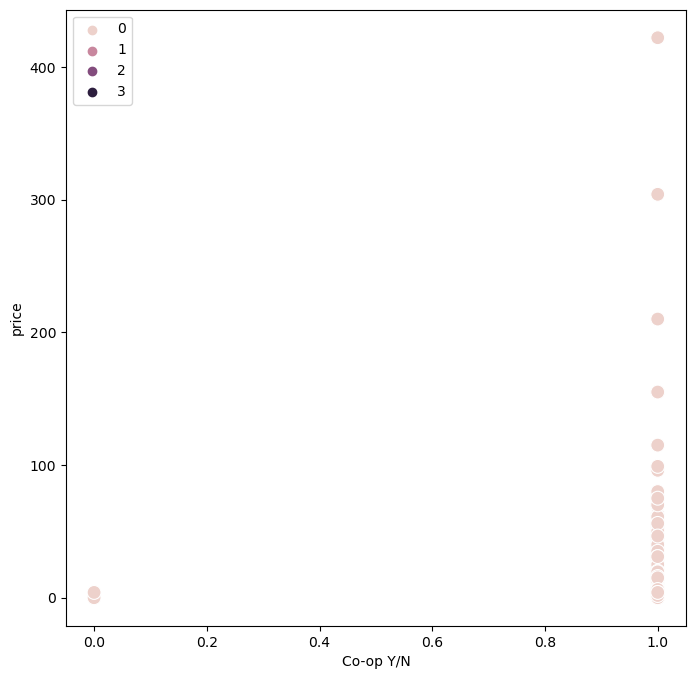

In [47]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['Co-op_yn'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Co-op Y/N') 
plt.ylabel('price') 
plt.show()

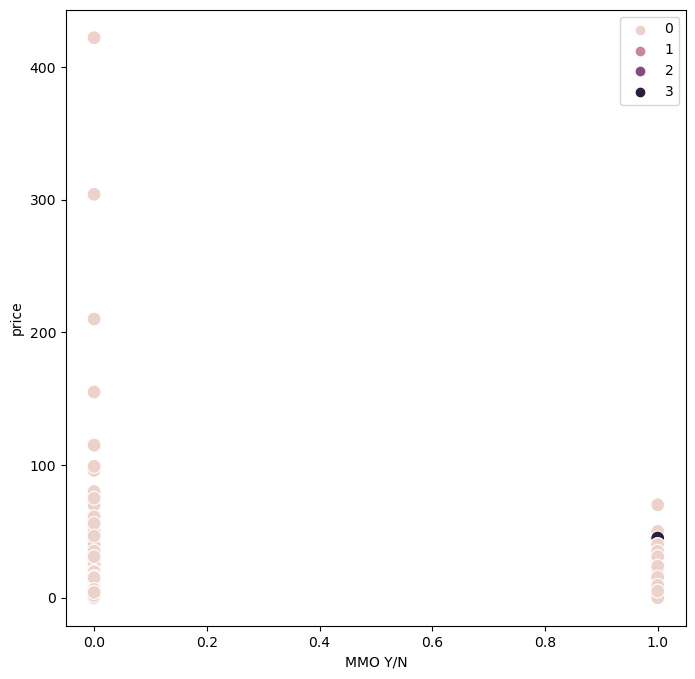

In [48]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['MMO_yn'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('MMO Y/N') 
plt.ylabel('price') 
plt.show()

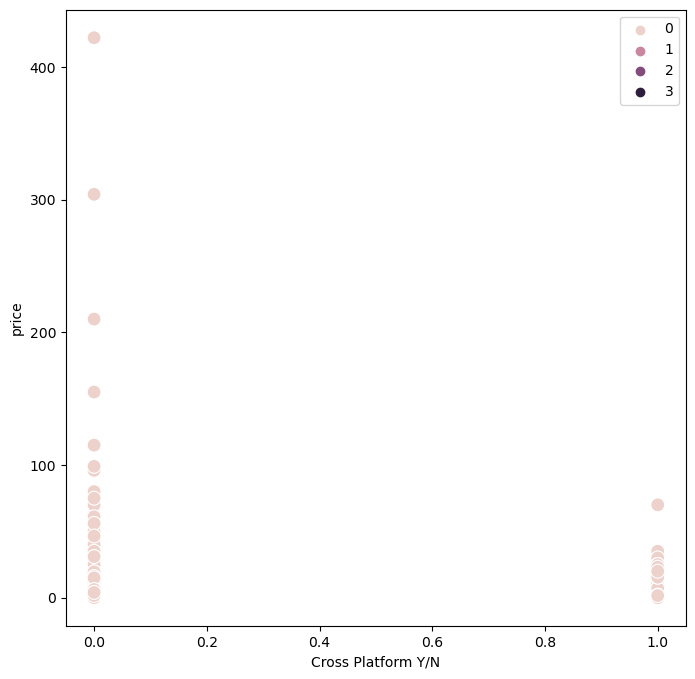

In [49]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['Cross_Platform_yn'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('Cross Platform Y/N') 
plt.ylabel('price') 
plt.show()

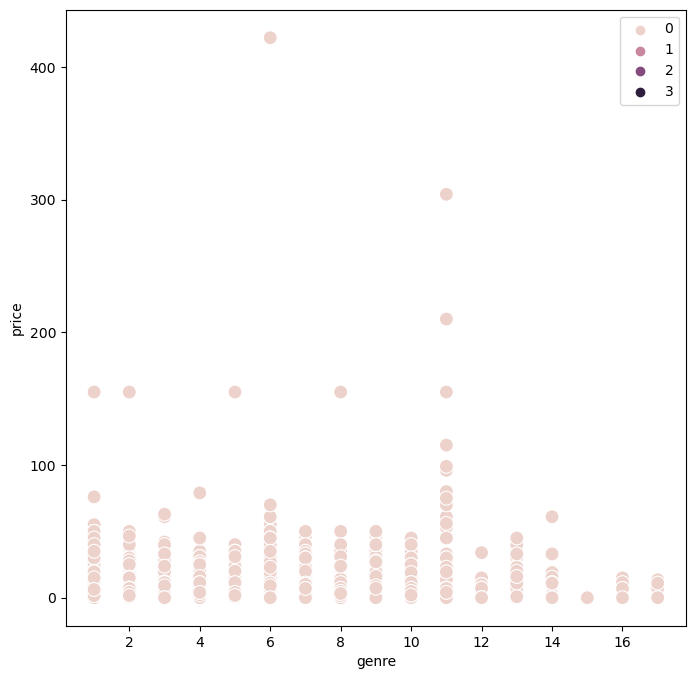

In [50]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['primary_genre'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('genre') 
plt.ylabel('price') 
plt.show()

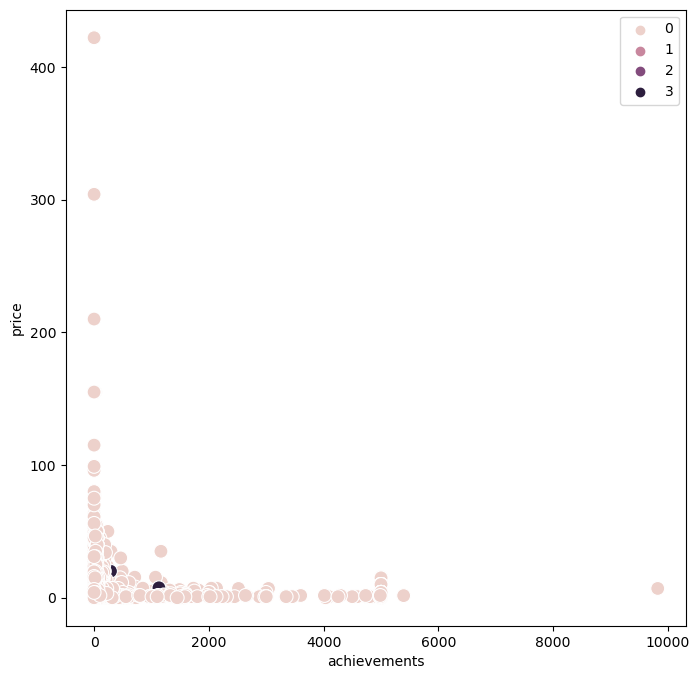

In [51]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['achievements'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('achievements') 
plt.ylabel('price') 
plt.show()

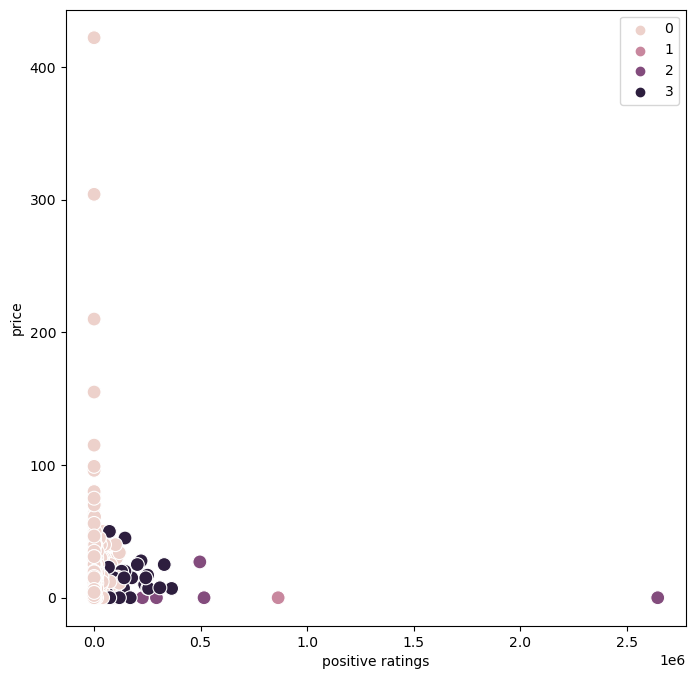

In [52]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['positive_ratings'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('positive ratings') 
plt.ylabel('price') 
plt.show()

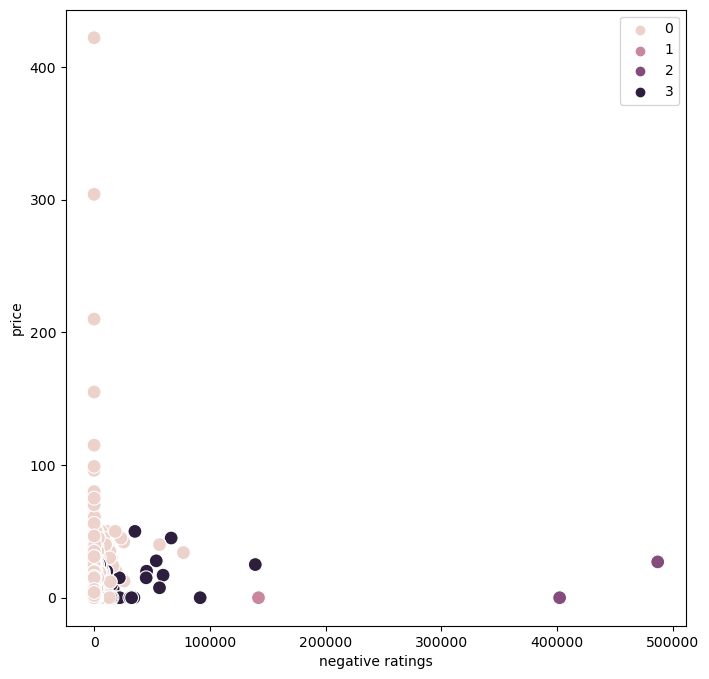

In [53]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['negative_ratings'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('negative ratings') 
plt.ylabel('price') 
plt.show()

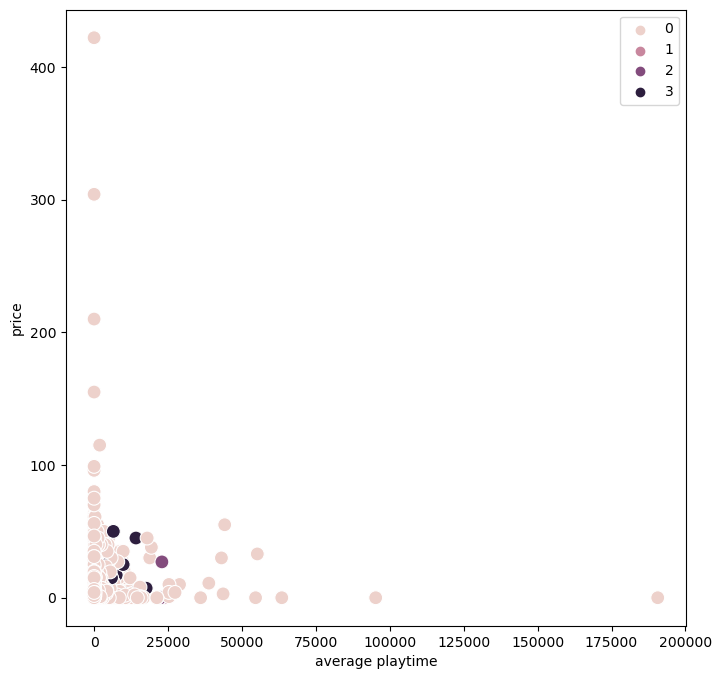

In [54]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['average_playtime'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('average playtime') 
plt.ylabel('price') 
plt.show()

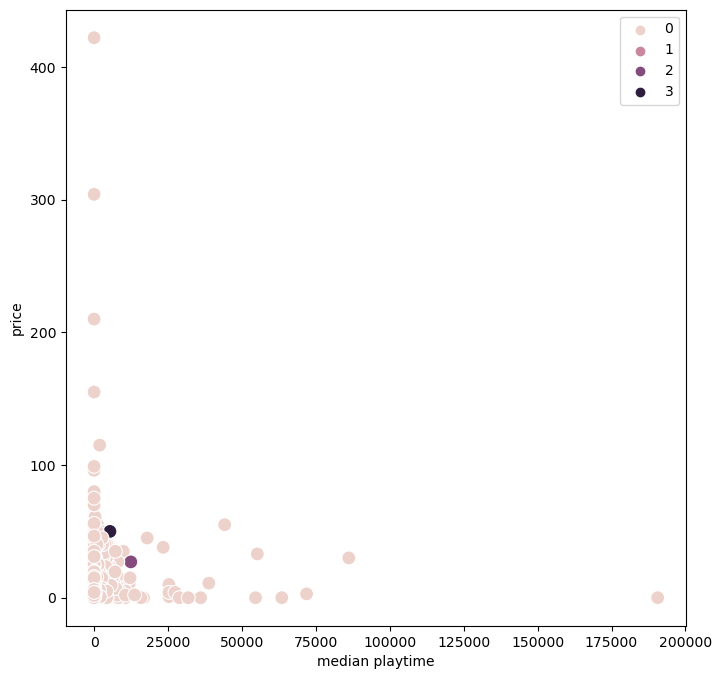

In [55]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['median_playtime'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('median playtime') 
plt.ylabel('price') 
plt.show()

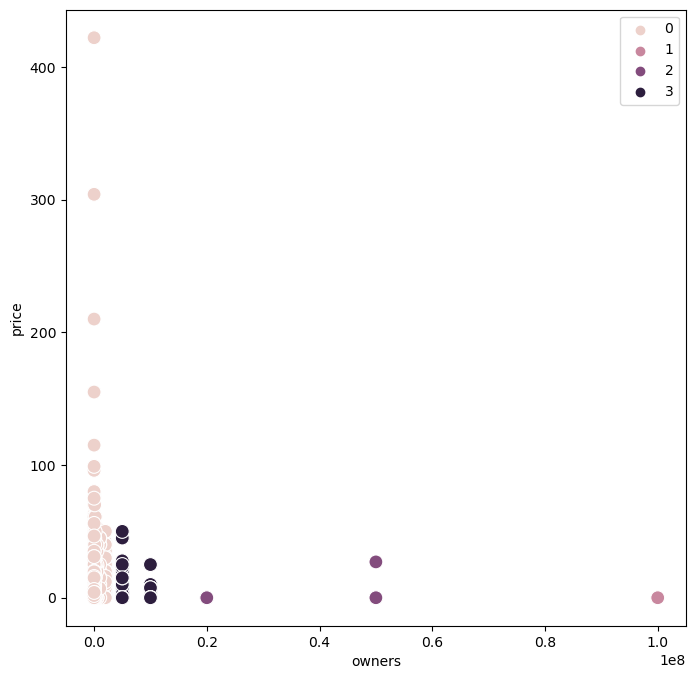

In [56]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['owners_low'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('owners') 
plt.ylabel('price') 
plt.show()

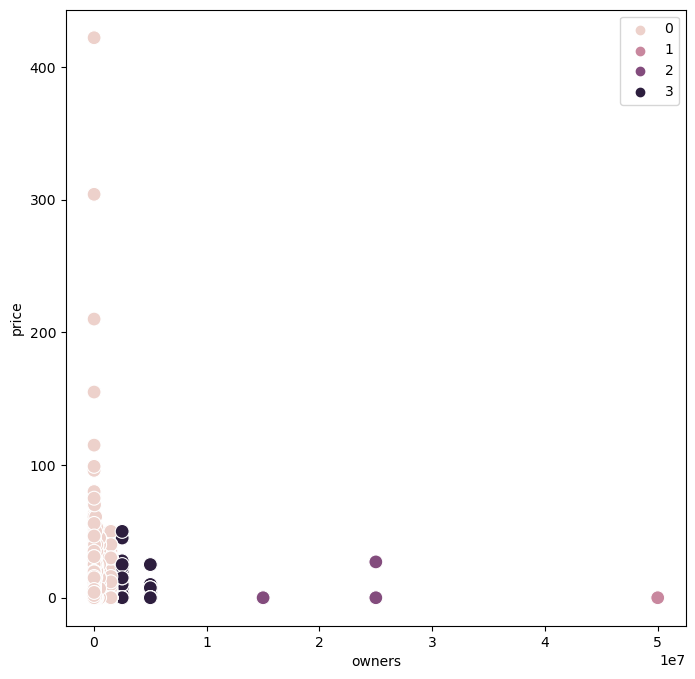

In [57]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['owners_mid'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('owners') 
plt.ylabel('price') 
plt.show()

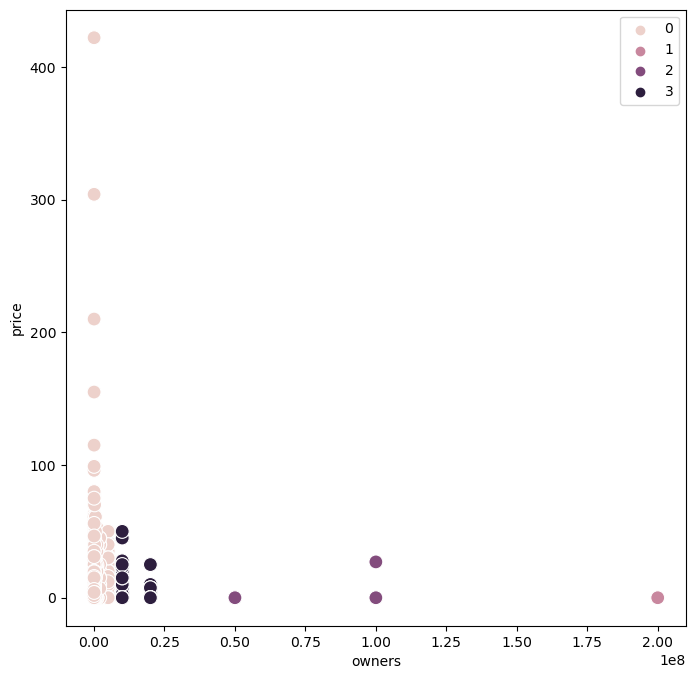

In [58]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=df_steam2['owners_high'], y=df_steam2['price'], hue=kmeans.labels_, s=100) 
ax.grid(True) 
plt.xlabel('owners') 
plt.ylabel('price') 
plt.show()

#### While I didn't check every single variable with each other, the ones I did look at seemed to show that many variables have a "Goldie Locks" effects on ratings. For example, between price and ratings, games with the highest ratings were neither free (for the most part), nor were they overly expensive. Likewise, the highest priced games seem to have the lowest number of owners. The majority of games people ownered were under 100 dollars, which isn't surprising as many people would be unwilling to pay a lot for a video game. It also appeared that paying more for a game did not equal to spending more time playing it. 

## 05 Calculate descriptive statistics for the clusters

In [65]:
df_steam2.loc[df_steam2['clusters'] == 3, 'cluster'] = 'dark purple' 
df_steam2.loc[df_steam2['clusters'] == 2, 'cluster'] = 'light purple'
df_steam2.loc[df_steam2['clusters'] == 1, 'cluster'] = 'pink'
df_steam2.loc[df_steam2['clusters'] == 0, 'cluster'] = 'light pink' 

In [75]:
df_steam2.groupby('cluster').agg({'price':['mean', 'median'],
                                  'negative_ratings': ['mean', 'median'],
                                 'positive_ratings':['mean', 'median'], 
                                 'release_year':['mean', 'median'],
                                'median_playtime': ['mean', 'median'],
                                  'average_playtime':['mean', 'median'],
                                  'owners_low':['mean', 'median'],
                                 'owners_mid': ['mean', 'median'],
                                 'owners_high': ['mean', 'median']})

price        negative_ratings           positive_ratings  \
                  mean median             mean    median             mean   
cluster                                                                     
dark purple   8.929254   6.99     15380.865672    5825.0     87183.194030   
light pink    6.072167   3.99       132.136869       9.0       600.457784   
light purple  5.398000   0.00    195035.000000   34036.0    835116.400000   
pink          0.000000   0.00    142079.000000  142079.0    863507.000000   

                       release_year         median_playtime         \
                median         mean  median            mean median   
cluster                                                              
dark purple    54090.0  2011.104478  2013.0      732.388060  302.0   
light pink        24.0  2016.512072  2017.0      143.843616    0.0   
light purple  496184.0  2013.200000  2013.0     4073.200000  623.0   
pink          863507.0  2013.000000  2013.0      801.000000  801.0   

             average_playtime             owners_low               \
                         mean   median          mean       median   
cluster                                                             
dark purple       3051.014925   1569.0  6.567164e+06    5000000.0   
light pink         139.412198      0.0  5.449008e+04          0.0   
light purple     12604.000000   8495.0  3.200000e+07   20000000.0   
pink             23944.000000  23944.0  1.000000e+08  100000000.0   

                owners_mid               owners_high               
                      mean      median          mean       median  
cluster                                                            
dark purple   3.283582e+06   2500000.0  1.313433e+07   10000000.0  
light pink    4.064527e+04     10000.0  1.357806e+05      20000.0  
light purple  1.900000e+07  15000000.0  7.000000e+07   50000000.0  
pink          5.000000e+07  50000000.0  2.000000e+08  200000000.0

#### According to these stats, the dark purple and light pink clusters are the best out of the four. Both of these have higher median prices than the other two clusters. The light pink clusters seem to correspond with the lower values in the dataset (except for price) as it has the lowest mean and medians of both positive and negative ratings. It also has the most recent game year, showing that newer video games aren't necessarily higher rated than older ones. The light pink cluster also has the lowest mean and median playtimes, but more owners than the pink and light purple clusters. The dark purple cluster, as discussed previously, seems to be more of middle ground. While the mean and median prices are higher than the other groups, the negative and positive ratings are niether the highest or lowest, same goes with playtime and game ownership. This seems to indicate that the data might have some outliers on the high end of the variables that do not match expectations. It does appear that people buy, enjoy, and spend more time playing games that are not too expensive, nor are the highest rated games free. 

## 06 Trying 3D plot (just for fun)

In [67]:
import plotly.express as px

In [73]:
fig1 = px.scatter_3d(df_steam2, x = 'positive_ratings', y = 'price', z = 'average_playtime', color = 'owners_mid')
fig1.show()